# A. Data and setup:

## 1. Import essential and visualization libraries / packages: numpy, pandas, statistics, matplotlib, seaborn;

In [230]:
#import stuffs
import numpy as np
import statistics as sts
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.chdir(os.getcwd())

## 2. Read in the csv files as a dataframe;

In [231]:
#init timer 
import time
class Timer(object):
    def __init__(self):
        self.times = []
        self.start()

    def start(self):
        self.start_time = time.time()

    def stop(self):
        self.times.append(time.time() - self.start_time)
        return self.times[-1]

In [232]:
df_small = pd.read_csv("data_steam_small.csv")
df_medium = pd.read_csv("data_steam_medium.csv")
df_large = pd.read_csv("data_steam_large.csv")

## 3. Print the first 5 rows of each dataframe.

In [233]:
df_small.tail(5)

,app_id,app_name,review_id,language,recommended,votes_helpful,steam_purchase,author.steamid,author.playtime_forever
9995,242760,The Forest,80465342,latam,True,0,False,76561198438675186,1557.0
9996,264710,Subnautica,67498670,danish,True,0,True,76561198887468822,593.0
9997,292030,The Witcher 3: Wild Hunt,69589614,russian,True,1,True,76561198074970616,3029.0
9998,227300,Euro Truck Simulator 2,15973476,english,True,0,True,76561198143449576,9686.0
9999,381210,Dead by Daylight,63092719,thai,True,0,True,76561199015442557,6927.0


In [234]:
df_medium.tail(5)

,app_id,app_name,review_id,language,recommended,votes_helpful,steam_purchase,author.steamid,author.playtime_forever
999995,578080,PLAYERUNKNOWN'S BATTLEGROUNDS,46511726,schinese,True,0,True,76561198165175073,42127.0
999996,518790,theHunter: Call of the Wild™,66042460,german,True,0,True,76561198287911011,1386.0
999997,239030,"Papers, Please",27844689,english,True,0,True,76561197982890226,297.0
999998,242920,Banished,56553200,english,True,0,True,76561198122657108,6782.0
999999,578080,PLAYERUNKNOWN'S BATTLEGROUNDS,40677586,thai,True,0,False,76561198341684726,216051.0


In [235]:
df_large.tail(5)

,app_id,app_name,review_id,language,recommended,votes_helpful,steam_purchase,author.steamid,author.playtime_forever
21747366,225540,Just Cause 3,56552788,english,True,1,True,76561198954710081,895.0
21747367,546560,Half-Life: Alyx,73577230,english,True,0,True,76561198035507513,378.0
21747368,447820,Day of Infamy,35709939,italian,False,0,False,76561198307320654,12.0
21747369,493340,Planet Coaster,38769766,thai,True,13,True,76561198078295360,2243.0
21747370,421020,DiRT 4,56840583,english,True,0,False,76561198400171961,1066.0


# B. Basic Questions:

## 1. Code a function to count different games in each dataset:

In [236]:
timer = Timer()
def count_games(df):
    timer.start()
    lst = df['app_id'].values.tolist()
    lst = set(lst)
    print('Time to exec count_games function is %.5f sec.' % timer.stop())
    print(f'There are {len(lst)} different games in this dataset.')

In [238]:
count_games(df_small)
count_games(df_medium)
count_games(df_large)

Time to exec count_games function is 0.00100 sec.
There are 86 different games in this dataset.
Time to exec count_games function is 0.09973 sec.
There are 315 different games in this dataset.
Time to exec count_games function is 2.27260 sec.
There are 315 different games in this dataset.


## 2. Write a min, max, mean functions to print the game's name, and the smallest, largest, average gaming hours of it in each dataset:

In [239]:
def init_subset(id, dset):
    dst = dset[(dset['app_id'] == id)]
    lst = dst['author.playtime_forever'].values.tolist()
    name = dst[(dst['app_id'] == id)]['app_name'].values.tolist()
    return lst, name

In [240]:
timer = Timer()
def min_max_mean (game_id, df):
    timer.start()
    min_val = 99999999
    max_val = -99999999
    sum = 0
    cnt = 0

    subset, name = init_subset(game_id, df)

    for i in subset :
        if ( i < min_val ): min_val = i
        if ( i > max_val ): max_val = i
        sum += i
        cnt += 1
    
    print('Time to exec min_max_mean function is %.5f sec.' % timer.stop())
    print(f'The game {name[0]} has {cnt} players:')
    print(f'Minimum hours played: {min_val} hours.')
    print(f'Maximum hours played: {max_val} hours.')
    print(f'Mean of the hours played: {sum/cnt} hours.')

In [241]:
min_max_mean(359550, df_small)

Time to exec min_max_mean function is 0.00299 sec.
The game Tom Clancy's Rainbow Six Siege has 1231 players:
Minimum hours played: 5.0 hours.
Maximum hours played: 391185.0 hours.
Mean of the hours played: 30112.37692932575 hours.


In [242]:
min_max_mean(359550, df_medium)

Time to exec min_max_mean function is 0.03191 sec.
The game Tom Clancy's Rainbow Six Siege has 38433 players:
Minimum hours played: 5.0 hours.
Maximum hours played: 913073.0 hours.
Mean of the hours played: 30545.55858246819 hours.


In [243]:
min_max_mean(359550, df_large)

Time to exec min_max_mean function is 0.49182 sec.
The game Tom Clancy's Rainbow Six Siege has 841918 players:
Minimum hours played: 1.0 hours.
Maximum hours played: 1290637.0 hours.
Mean of the hours played: 30663.04475495238 hours.


# C. Algorithms:

## 1. A function to detect even and odd numbers, and count how many IDs that are odd or even:

In [244]:
def odd_even(x):
    return True if x % 2 == 0 else False

In [245]:
timer = Timer()
def list_oe(df):
    timer.start()
    odd, even = 0, 0
    lst = df['review_id'].values.tolist()
    for i in lst:
        if odd_even(i): odd += 1
        else: even += 1
    print('Time to exec list_oe function is %.5f sec.' % timer.stop())
    print(f'There are {odd} odd and {even} even review IDs in the dataset')

In [246]:
list_oe(df_small)

Time to exec list_oe function is 0.00199 sec.
There are 5061 odd and 4939 even review IDs in the dataset


In [247]:
list_oe(df_medium)

Time to exec list_oe function is 0.26329 sec.
There are 500339 odd and 499661 even review IDs in the dataset


In [248]:
list_oe(df_large)

Time to exec list_oe function is 5.03229 sec.
There are 10871139 odd and 10876232 even review IDs in the dataset


## 2. Code a search function to find the name of the game and count the number of *newbies* (0 to 100 hours), *casual players* (100 to 1000 hours) and *veteran players* (above 1000 hours) of the given game ID in each dataset:

In [249]:
def check_gamer(x):
    if x <= 100: return 1
    if 100 < x <= 1000: return 2
    if x > 1000: return 3

In [250]:
timer = Timer()
def count_gamers(game_id, df):
    timer.start()
    new, cas, vet = 0, 0, 0
    lst, name = init_subset(game_id, df)
    for i in lst:
        if check_gamer(i) == 1: new += 1
        if check_gamer(i) == 2: cas += 1
        if check_gamer(i) == 3: vet += 1
    print('Time to exec count_gamer function is %.5f sec.' % timer.stop())
    print(f'In {name[0]}, there are: \n- {new} Newbies; \n- {cas} Casual Players; \n- {vet} Veteran Players.')

In [251]:
count_gamers(292030, df_small)

Time to exec count_gamer function is 0.00399 sec.
In The Witcher 3: Wild Hunt, there are: 
- 6 Newbies; 
- 56 Casual Players; 
- 601 Veteran Players.


In [252]:
count_gamers(292030, df_medium)

Time to exec count_gamer function is 0.05286 sec.
In The Witcher 3: Wild Hunt, there are: 
- 208 Newbies; 
- 1903 Casual Players; 
- 19416 Veteran Players.


In [253]:
count_gamers(292030, df_large)

Time to exec count_gamer function is 0.80966 sec.
In The Witcher 3: Wild Hunt, there are: 
- 4535 Newbies; 
- 40211 Casual Players; 
- 424649 Veteran Players.


## 3. Code a sort function to list *ten of the most tryhard players* by ID in a given game ID in each of the dataset (who has a lot of Steam purchases).

In [254]:
def qsort(arr):
    n = len(arr)

    if n < 2:
        return arr
    
    current_pos = 0

    for i in range(1, n):
         if arr[i] <= arr[0]:
              current_pos += 1
              temp = arr[i]
              arr[i] = arr[current_pos]
              arr[current_pos] = temp

    temp = arr[0]
    arr[0] = arr[current_pos] 
    arr[current_pos] = temp
    
    left = qsort(arr[0: current_pos]) 
    right = qsort(arr[current_pos+1: n]) 

    arr = left + [arr[current_pos]] + right
    
    return arr

In [255]:
timer = Timer()
def gamer_list(game_id, df):
    timer.start()

    subset, name = init_subset(game_id, df)
    subset = qsort(subset)
    print(f"List of the top veteran gamers of {name[0]}:")
    count = 1
    for i in reversed(range(len(subset) - 5, len(subset))): 
        dst = df[(df['app_id'] == game_id) & (df['author.playtime_forever'] == subset[i])]
        print('Player with the Steam ID of',dst['author.steamid'].iloc[0], 'has spent', subset[i], 'hours.')
        count+=1
    print('Time to exec gamer_list function is %.5f sec.' % timer.stop())

In [256]:
gamer_list(359550, df_small)

List of the top veteran gamers of Tom Clancy's Rainbow Six Siege:
Player with the Steam ID of 76561198154035827 has spent 391185.0 hours.
Player with the Steam ID of 76561198356047100 has spent 286103.0 hours.
Player with the Steam ID of 76561198376604120 has spent 251366.0 hours.
Player with the Steam ID of 76561198108078089 has spent 222984.0 hours.
Player with the Steam ID of 76561198352050828 has spent 213372.0 hours.
Time to exec gamer_list function is 0.02393 sec.


In [257]:
gamer_list(359550, df_medium)

List of the top veteran gamers of Tom Clancy's Rainbow Six Siege:
Player with the Steam ID of 76561198824344994 has spent 913073.0 hours.
Player with the Steam ID of 76561197995627463 has spent 720340.0 hours.
Player with the Steam ID of 76561198281668904 has spent 691221.0 hours.
Player with the Steam ID of 76561198125916358 has spent 674140.0 hours.
Player with the Steam ID of 76561198116749257 has spent 576502.0 hours.
Time to exec gamer_list function is 0.37200 sec.


In [258]:
gamer_list(359550, df_large)

List of the top veteran gamers of Tom Clancy's Rainbow Six Siege:
Player with the Steam ID of 76561198084676628 has spent 1290637.0 hours.
Player with the Steam ID of 76561198117501846 has spent 1241830.0 hours.
Player with the Steam ID of 76561198125619625 has spent 1200949.0 hours.
Player with the Steam ID of 76561197960623457 has spent 1185191.0 hours.
Player with the Steam ID of 76561198287628621 has spent 1162654.0 hours.
Time to exec gamer_list function is 8.20635 sec.


# D. Chart Illustration:

## 1. Draw a pie chart to display top 5 languages used for the game reviews (You can use pandas's value_counts function);

In [259]:
timer = Timer()
def pie_chart(df):
    timer.start()
    rest = 0
    lang_list = list(set(df['language'].values.tolist()))
    lang_count, lang_label = [], []
    lst = df['language'].value_counts()
    for i in lang_list:
        num = lst[i]
        if num / len(df) < 0.038: rest += num
        else:
            lang_count.append(num)
            lang_label.append(i)
    lang_count.append(rest)
    lang_label.append('the rest')
    plt.pie(lang_count , labels = lang_label, startangle = 0, autopct = '%1.2f%%')
    plt.legend()
    plt.show()
    print('Time to exec pie_chart function is %.5f sec.' % timer.stop())

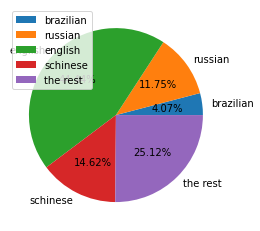

In [260]:
pie_chart(df_small)

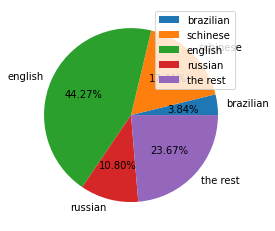

In [261]:
pie_chart(df_medium)

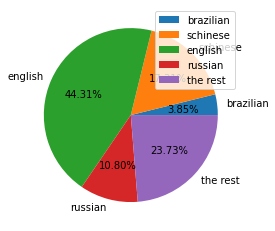

In [262]:
pie_chart(df_large)

## 2. Draw horizontal bar plots to show the total players of *5 of the most reviewed game* in the dataset and their *three type of players*.

In [314]:
def bar_plot(df):
    new, cas, vet = [], [], []
    player_count, game_name = [], []
    ids = list(set(df['app_id'].values.tolist()))
    lst = df['app_id'].value_counts()

    for i in ids:
        player_count.append(lst[i])
        game_name.append(df[(df['app_id'] == i)]['app_name'].values.tolist()[0])

    dff = pd.DataFrame(game_name, columns = ['name'])
    dff['count'] = player_count
    dff['id'] = ids
    dff = dff.sort_values(by ='count', ascending = False)
    ids = dff['id'].values.tolist()[0:5]

    for i in ids:
        n, c, v = 0, 0, 0
        lst, _ = init_subset(i, df)
        for idx in lst:
            if check_gamer(idx) == 1: n += 1
            if check_gamer(idx) == 2: c += 1
            if check_gamer(idx) == 3: v += 1
        new.append(n)
        cas.append(c)
        vet.append(v)

    labels = dff['name'].values.tolist()[0:5]
    fig = plt.figure(figsize = (13, 8))
    plt.bar(labels, new, color = 'r')
    plt.bar(labels, cas, bottom = new, color = 'g')
    plt.bar(labels, vet, bottom = cas, color = 'b')
    plt.title('Top 5 games has the most reviews ever')
    plt.legend(["Newbie", "Casual", "Veteran"], prop ={'size':20})
    plt.show()

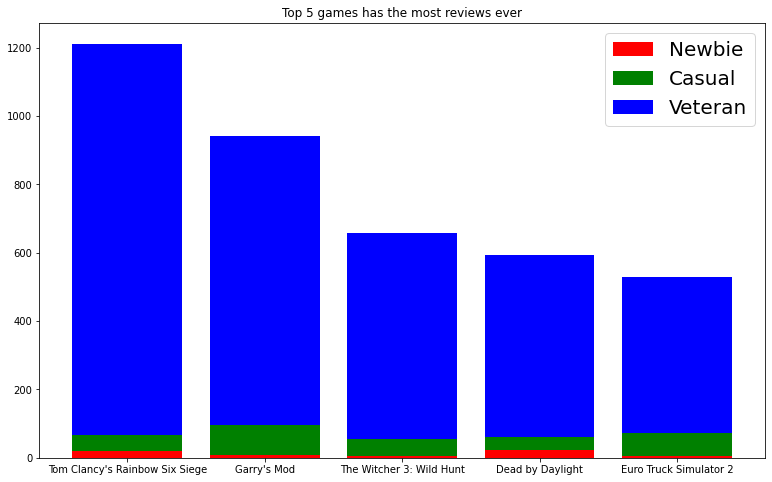

In [315]:
bar_plot(df_small)

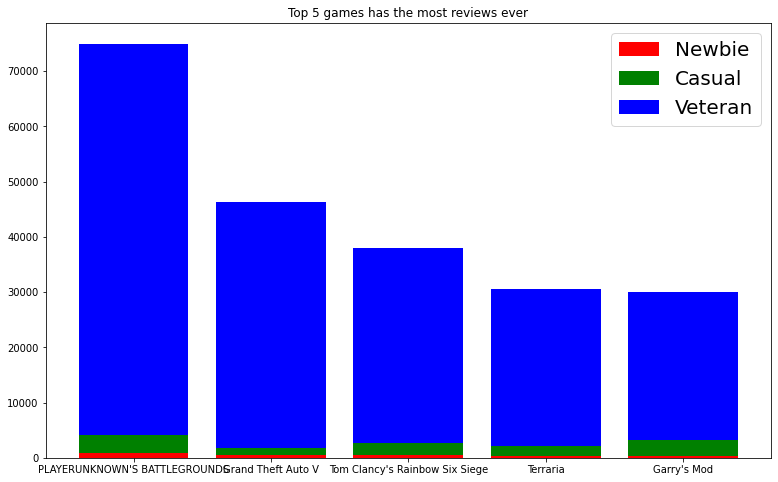

In [316]:
bar_plot(df_medium)

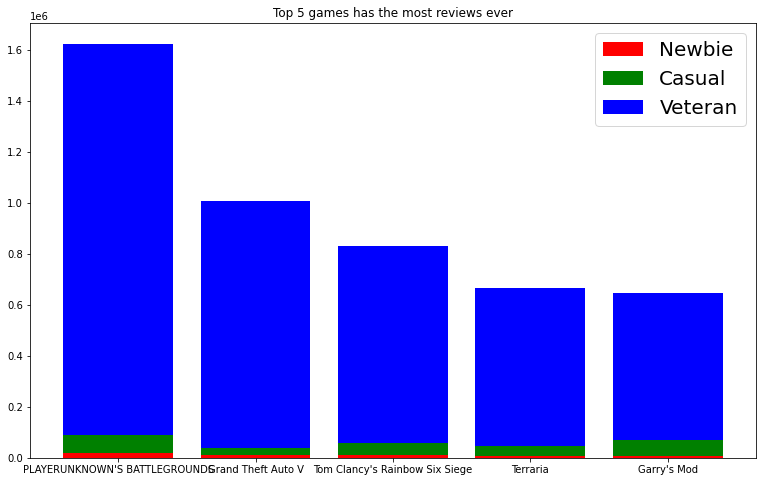

In [317]:
bar_plot(df_large)